In [1]:
import numpy as np
import pandas as pd

In [2]:
import glob   
import cv2
import matplotlib.pyplot as pl

In [3]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [4]:
data = pd.read_csv("D:/face.csv", header = None)

In [5]:
data.head
print(data.shape)
x = data.iloc[:, :-1]
y = data.iloc[:,-1]

(2414, 1025)


In [6]:
x = x -  np.mean(x) # 由於圖片為灰階，進行中心化即可

In [7]:
pca = PCA(n_components = 30, whiten = True).fit(x)
eigenfaces = pca.components_.reshape((30, 32, 32))

In [8]:
print (np.cumsum(pca.explained_variance_ratio_))

[0.35945525 0.71156621 0.76022888 0.78849032 0.80381941 0.81793008
 0.82844373 0.83777705 0.84503711 0.85173127 0.85812949 0.86339487
 0.8683436  0.87289439 0.87693796 0.88077979 0.8843032  0.88772594
 0.89089928 0.89401524 0.89684248 0.89942723 0.901892   0.90432633
 0.90659211 0.90868095 0.91075803 0.91276824 0.91466919 0.91647254]


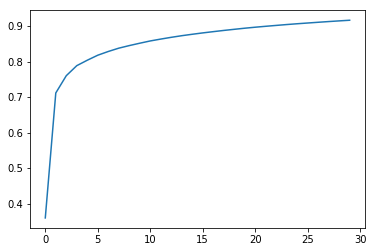

In [10]:
pl.plot(np.cumsum(pca.explained_variance_ratio_))

In [11]:
x_dr = pca.transform(x)

In [12]:
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize = (1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom = 0, left = .01, right = .99, top = .90, hspace = .35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(titles[i], size = 12)
        pl.xticks(())
        pl.yticks(())

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

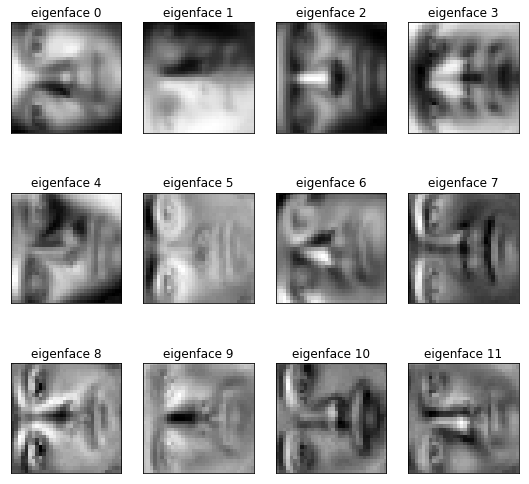

In [14]:
eigenface_titles = ['eigenface %d' % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, 32, 32)

In [15]:
def SVM(X, y, k):
    kf = KFold(n_splits = k, shuffle = True)
    precision_average = 0.0
    tuned_parameters = [{'kernel': ['rbf'], 
                         'gamma': [0.001, 0.01, 0.05 , 0.1],
                         'C': [1, 2, 3, 5, 10, 100]},
                        {'kernel': ['linear'], 'C': [1, 2, 3, 5, 10, 100]}]
    
    clf = GridSearchCV(SVC(), tuned_parameters)
    X = np.array(X)
    y = np.array(y)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = clf.fit(X_train, y_train)
        test_pred = clf.predict(X_test)
        # 計算平均準確率
        precision = 0
        for i in range(0, len(y_test)):
            if (y_test[i] == test_pred[i]):
                precision = precision + 1
        precision_average = precision_average + float(precision)/len(y_test)
    precision_average = precision_average / k    
    return precision_average

In [16]:
SVM(x, y, 3)

0.9109349731672899

In [17]:
import seaborn as sns

In [18]:
x.shape

(2414, 1024)

In [19]:
img = x.values[0].reshape((32, 32))

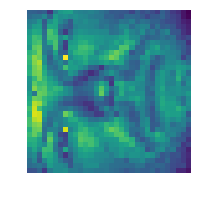

In [21]:
def show_img(img):
    """展示图片"""
    pl.figure(figsize=(3, 3))
    pl.axis('off')
    pl.imshow(img)
    pl.show()

show_img(img)

In [ ]:
# 均值濾波

In [22]:
blur = cv2.blur(img, (3,5))

(<matplotlib.axes._subplots.AxesSubplot at 0x231b99cb358>,
 <matplotlib.image.AxesImage at 0x231b9a47438>)

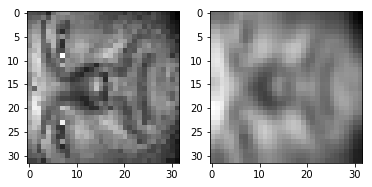

In [24]:
pl.subplot(1,2,1), pl.imshow(img,'gray')
pl.subplot(1,2,2), pl.imshow(blur,'gray')